## **Data Science and Analysis**: Predicting Weather based on Music Listening Patterns
### Report by: Gabriel DiMartino for CPSC 222 Intro to Data Science

### Introduction:
For this project, Spotify Listening data and Weather data for Alexandria VA. I am researching this domain, because I am interested in the applications my Spotify. If a correlation between Spotify and the Weather exists, other factors such as mental health might be predictable. The data format for this project consisted of a mix between CSV and JSON. Because of the poor quality of Spotify data, The SpotiPY API was used to add additional information such as dance ability and energy for each song. The result was a CSV containing critical data for each song. The tables included in these datasets are: **Alexandria Weather** and **Spotify API Data**.

As mentioned earlier, the data for **Spotify** was collected both from Spotify Listening and the Spotify Python API. Similarly, the **Alexandria Weather** was collected from sources such as the National Weather Service. Combined, the tables make up 1900 instances for the months of **June - August**, with the weather data being repeated to match the several instances of music.

The relevant instances of the Spotify Data include:
- **Date:** Attribute to merge both datasets
- **Dancebility:** Attribute bound between 0 and 1
- **Energy:** Attribute bound between 0 and 1
- **Loudness:** Attribute bound between 0 and -20
- **Speechness:** Attribute bound between 0 and 1
- **Acousticness:** Attribute bound between 0 and 1
- **Instrumentalness:** Attribute bound between 0 and 1
- **Liveness:** Attribute bound between 0 and 1
- **Valence:** Attribute bound between 0 and 1
- **Tempo:** Attribute determined by the beats per second.

The relevant instances of the Weather Data include:
- **Date:** Attribute to merge both datasets
- **Conditions:** 5 classifications for the type of weather

From this data, I am attempting to classify the type of weather, based on my music history. The potential impact of this analysis is the use of my Spotify data to classify other meaningful attributes such as mental health or current activity. If this methodology can be generalized, potential stakeholders and benefactors from this research include psychologists and psychiatrists who could use similar methods to determine depression or bi-polar states.

In [88]:
import pandas as pd
import numpy as np
dataset_spotify = pd.read_csv('apiData.csv', header=0)
dataset_weather_alexandria = pd.read_csv('alexandria.csv', header=0)
dataset_weather = dataset_weather_alexandria[['date', 'conditions']]

### Data Analysis:
Using CSV files `apiData.csv` and `alexandria.csv`, a Pandas Data frame is created to manipulate the data inside the Jupyter notebook. Because the only relevant data from the Alexandria Weather is the Date (Which is used as the merge key), and Conditions (which outline the classification of each instance), all other attributes are dropped initially. Finally, the datasets are merged from inner and displayed below.

In [89]:
merged_dataset = dataset_spotify.merge(dataset_weather, on='date',)
display(merged_dataset)

,Year,Month,Day,time,trackName,albumName,artistName,playlists.name,track_id,date,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,conditions
0,2023,6,22,02:00:00,"Amish Paradise (Parody of ""Gangsta's Paradise""...",Bad Hair Day,"""Weird Al"" Yankovic",HOmeWorK BANgers,5r96TaQquRrlo3Ym3ZlSL2,6/22/2023,...,1,0.1720,0.103000,0.000000,0.2670,0.4830,80.902,202920,4,Partially cloudy
1,2023,6,22,02:00:00,"Amish Paradise (Parody of ""Gangsta's Paradise""...",Bad Hair Day,"""Weird Al"" Yankovic",HOmeWorK BANgers,5r96TaQquRrlo3Ym3ZlSL2,6/22/2023,...,1,0.1720,0.103000,0.000000,0.2670,0.4830,80.902,202920,4,"Rain, Overcast"
2,2023,6,22,20:03:00,I'm Born To Run,What We Live For,American Authors,The Knew,6zDs6zI94L761vd0cVScTT,6/22/2023,...,1,0.0486,0.066200,0.000000,0.0788,0.6750,126.041,206920,4,Partially cloudy
3,2023,6,22,20:03:00,I'm Born To Run,What We Live For,American Authors,The Knew,6zDs6zI94L761vd0cVScTT,6/22/2023,...,1,0.0486,0.066200,0.000000,0.0788,0.6750,126.041,206920,4,"Rain, Overcast"
4,2023,6,22,10:09:00,Do I Wanna Know?,AM,Arctic Monkeys,Me and michael,5FVd6KXrgO9B3JPmC8OPst,6/22/2023,...,1,0.0323,0.186000,0.000263,0.2170,0.4050,85.030,272394,4,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,2023,6,19,17:29:00,Welcome to the Black Parade,The Black Parade,My Chemical Romance,Missing Her,5wQnmLuC1W7ATsArWACrgW,6/19/2023,...,1,0.0752,0.000289,0.000110,0.2220,0.2360,96.950,311107,4,"Rain, Partially cloudy"
1990,2023,7,30,13:31:00,So Tied Up,LA DIVINE,Cold War Kids,Missing Her,3msS7xaelR4Oa0n7IwHkgF,7/30/2023,...,0,0.0402,0.030900,0.000022,0.1790,0.8100,104.993,189507,4,Clear
1991,2023,7,30,13:31:00,So Tied Up,LA DIVINE,Cold War Kids,Missing Her,3msS7xaelR4Oa0n7IwHkgF,7/30/2023,...,0,0.0402,0.030900,0.000022,0.1790,0.8100,104.993,189507,4,Partially cloudy
1992,2023,7,30,05:30:00,Les pensées,Foundations,The Architect,Missing Her,0fira69E5qwYJNSvzEOCs7,7/30/2023,...,0,0.0392,0.015100,0.020500,0.0969,0.0392,97.975,238156,4,Clear


#### Data Cleaning
Because the classification data for the weather is qualitative and not quantitative (Meaning they classification uses strings not integers), 2 functions were created to fill in this missing data. The First `enumerate_conditions(conditions)` takes the attribute of conditions from the dataset and steps through each instance and enumerates them, returning a new attribute `ConditionsEnum`. The second function is `binary_precipitation(value)` which takes in the already enumerated data, and sorts it into binary values 1 and 0 to represent **Rain vs No Rain**.

In [90]:
def enumerate_conditions(conditions):
   condition_mapping = {condition: index for index, condition in enumerate(set(conditions))}
   enumerated_data = [condition_mapping[condition] for condition in conditions]
   return enumerated_data

In [91]:
def binary_precipitation(value):
    if value != 1 and value != 3:
        return 1
    else:
        return 0

Finally, after defining these helper functions, they are applied to the dataset and new attributes are created within the data frame. This cleaning was necessary, as classification techniques require integer inputs to produce valid outputs. Similarly, a look up table was created for an easy reference to the String to Enum Conversion. This will be useful when visualizing the data to provide Human Readable language instead of integer values.

In [92]:
merged_dataset['conditionsEnum'] = enumerate_conditions(merged_dataset['conditions'])
merged_dataset['conditionsBinary'] = merged_dataset['conditionsEnum'].apply(binary_precipitation)
display(merged_dataset[['conditions','conditionsEnum','conditionsBinary']])

,conditions,conditionsEnum,conditionsBinary
0,Partially cloudy,3,0
1,"Rain, Overcast",0,1
2,Partially cloudy,3,0
3,"Rain, Overcast",0,1
4,Partially cloudy,3,0
...,...,...,...
1989,"Rain, Partially cloudy",2,1
1990,Clear,1,0
1991,Partially cloudy,3,0
1992,Clear,1,0


In [93]:
unique_conditions_key = merged_dataset[['conditions', 'conditionsEnum']].drop_duplicates()
unique_conditions_key = unique_conditions_key.sort_values(by='conditionsEnum')
display(unique_conditions_key)

,conditions,conditionsEnum
1,"Rain, Overcast",0
8,Clear,1
9,"Rain, Partially cloudy",2
0,Partially cloudy,3
1330,Overcast,4


#### Data Visualization
Utilizing the enumerated data, 4 graphs were constructed using MatplotLib to display 4 key elements of a song Energy, Temp, Dance ability, and Loudness. These values were compared to the weather to try and see any relationship between a song and the current weather.

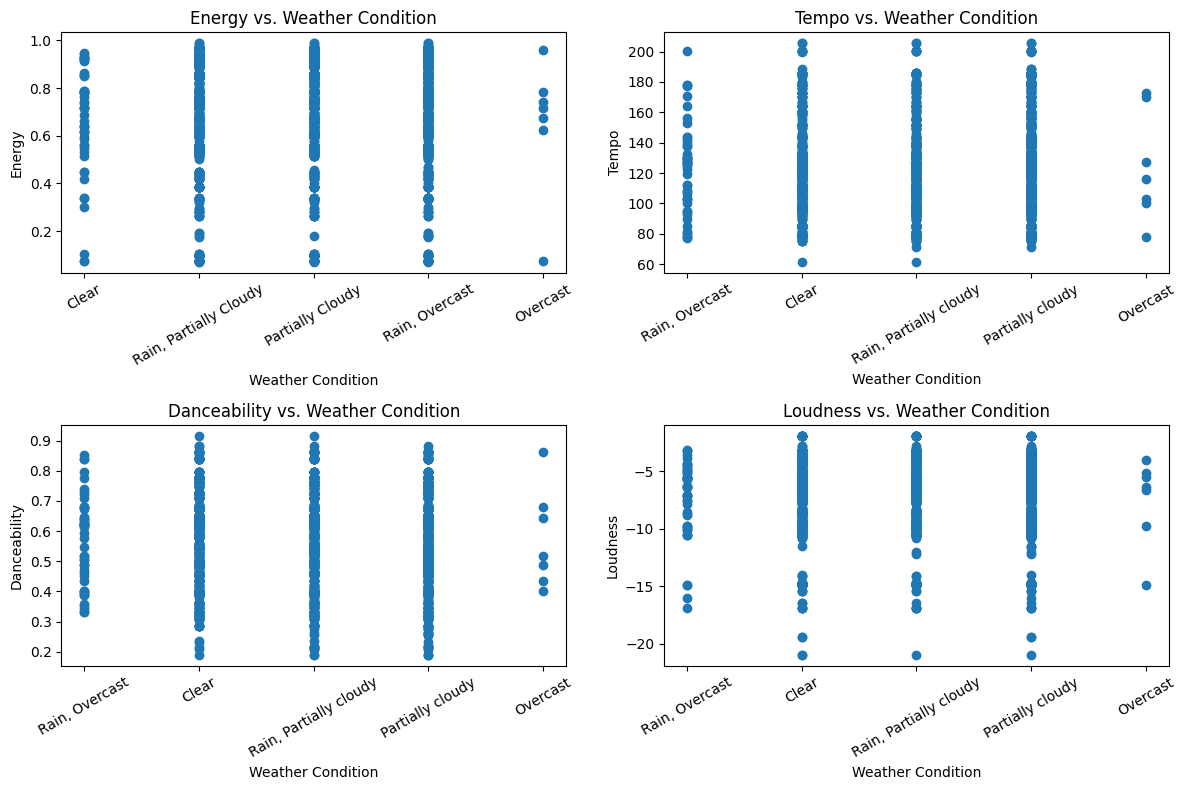

In [94]:
import matplotlib.pyplot as plt

energy_dataset = merged_dataset['energy']
tempo_dataset = merged_dataset['tempo']
danceability_dataset = merged_dataset['danceability']
loudness_dataset = merged_dataset['loudness']
enumerated_conditions_dataset = merged_dataset['conditionsEnum']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].scatter(enumerated_conditions_dataset, energy_dataset, marker='o', linestyle='-')
axes[0, 0].set_xticks(range(len(unique_conditions_key['conditions'])))
axes[0, 0].set_xticklabels(['Clear','Rain, Partially Cloudy','Partially Cloudy','Rain, Overcast','Overcast'])
axes[0, 0].set_title('Energy vs. Weather Condition')
axes[0, 0].set_xlabel('Weather Condition')
axes[0, 0].set_ylabel('Energy')
axes[0, 0].tick_params(axis='x', rotation=30)

axes[0, 1].scatter(enumerated_conditions_dataset, tempo_dataset, marker='o', linestyle='-')
axes[0, 1].set_xticks(range(len(unique_conditions_key['conditions'])))
axes[0, 1].set_xticklabels(unique_conditions_key['conditions'])
axes[0, 1].set_title('Tempo vs. Weather Condition')
axes[0, 1].set_xlabel('Weather Condition')
axes[0, 1].set_ylabel('Tempo')
axes[0, 1].tick_params(axis='x', rotation=30)

axes[1, 0].scatter(enumerated_conditions_dataset, danceability_dataset, marker='o', linestyle='-')
axes[1, 0].set_xticks(range(len(unique_conditions_key['conditions'])))
axes[1, 0].set_xticklabels(unique_conditions_key['conditions'])
axes[1, 0].set_title('Danceability vs. Weather Condition')
axes[1, 0].set_xlabel('Weather Condition')
axes[1, 0].set_ylabel('Danceability')
axes[1, 0].tick_params(axis='x', rotation=30)

axes[1, 1].scatter(enumerated_conditions_dataset, loudness_dataset, marker='o', linestyle='-')
axes[1, 1].set_xticks(range(len(unique_conditions_key['conditions'])))
axes[1, 1].set_xticklabels(unique_conditions_key['conditions'])
axes[1, 1].set_title('Loudness vs. Weather Condition')
axes[1, 1].set_xlabel('Weather Condition')
axes[1, 1].set_ylabel('Loudness')
axes[1, 1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

Reviewing the information provided by the 4 graphs, the data highlights an interesting trend where the range of Energy, Tempo, Dance ability, and Loudness varies without any relationship to the weather condition. If there was a relationship, clustering would appear on the graphs, where energy for example would be higher on clear days and lower on overcast days. Due to this lack of relationship, classification attempts will most likely fail.

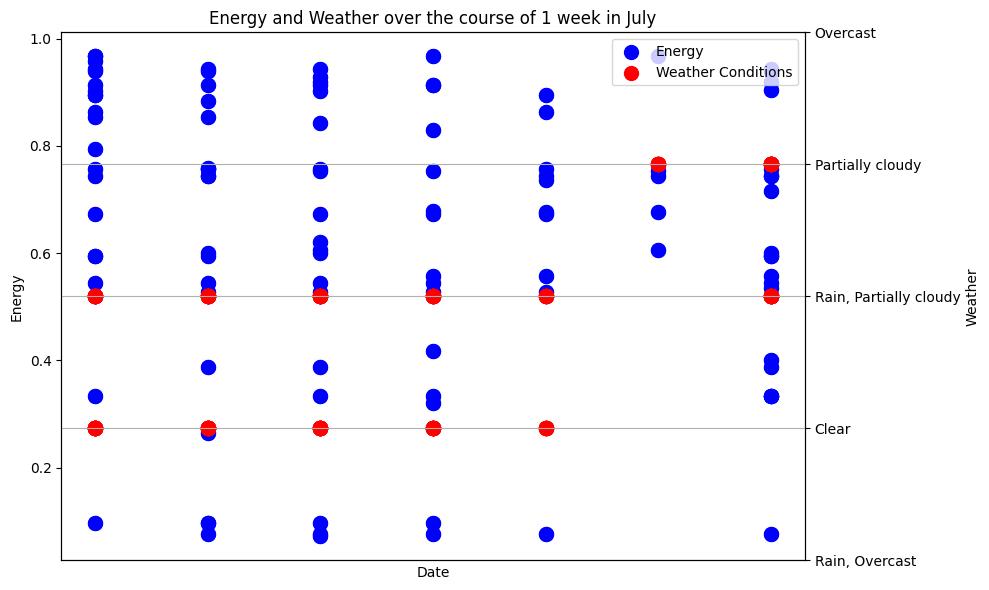

In [95]:
week_data = merged_dataset[(merged_dataset['Day'] <= 7) & (merged_dataset['Month'] == 7)]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.scatter(week_data['date'], week_data['energy'], marker='o', s=100, c='blue', label='Energy')
ax1.set_ylabel('Energy')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()

ax2.scatter(week_data['date'], week_data['conditionsEnum'], marker='o', s=100, c='red', label='Weather Conditions')
ax2.set_ylabel('Weather')

custom_ticks = unique_conditions_key['conditionsEnum'].tolist()
custom_labels = unique_conditions_key['conditions'].tolist()
ax2.set_yticks(custom_ticks)
ax2.set_yticklabels(custom_labels)

# Add a legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2

plt.legend(lines, labels, loc='best')
plt.xticks([])
plt.grid(True)
plt.title('Energy and Weather over the course of 1 week in July')
plt.tight_layout()
plt.show()


Taking a closer look at the energy vs weather conditions over the first week in July, the data from before is made clearer. As shown above, each song varies in energy for each day, and is independent of the weather. However, this new graph also highlights how each day can have more than one weather type. This is accurate to the weather in Virginia as it can vary from raining for 30 minutes intermittently to a clear and sunny day. Due to this double classification, will not impact the prediction model, as each song has only 1 classification for weather.

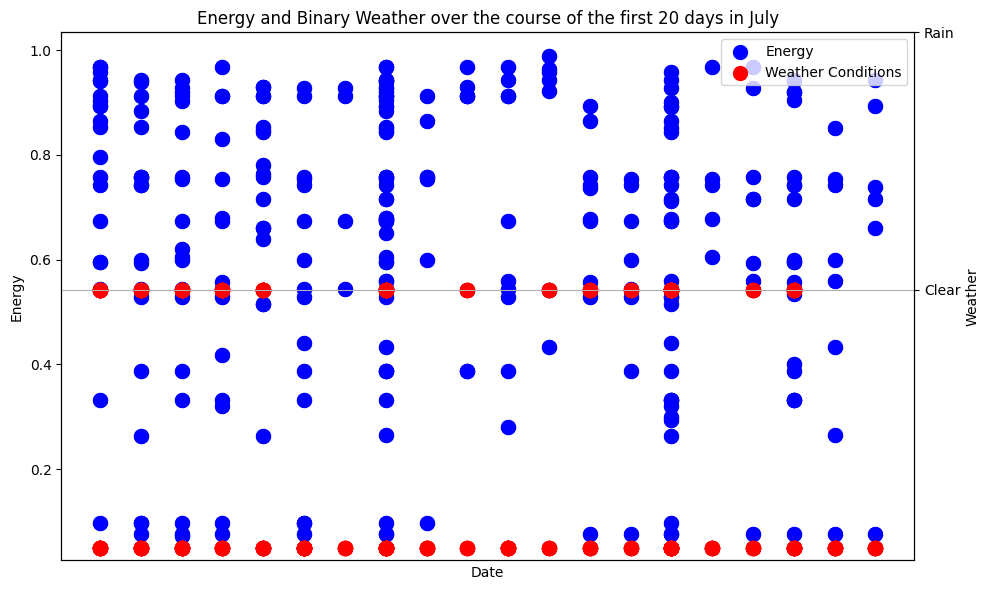

In [96]:
import matplotlib.pyplot as plt

week_data_binary = merged_dataset[(merged_dataset['Day'] <= 20) & (merged_dataset['Month'] == 7)]

fig, binary_ax1 = plt.subplots(figsize=(10, 6))

binary_ax1.scatter(week_data_binary['date'], week_data_binary['energy'], marker='o', s=100, c='blue', label='Energy')
binary_ax1.set_ylabel('Energy')
binary_ax1.set_xlabel('Date')

binary_ax2 = binary_ax1.twinx()

binary_ax2.scatter(week_data_binary['date'], week_data_binary['conditionsBinary'], marker='o', s=100, c='red', label='Weather Conditions')
binary_ax2.set_ylabel('Weather')

binary_ax2.set_yticks([1, 2])
binary_ax2.set_yticklabels(['Clear', 'Rain'])

# Add a legend for both lines
lines1, labels1 = binary_ax1.get_legend_handles_labels()
lines2, labels2 = binary_ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2

plt.legend(lines, labels, loc='best')
plt.xticks([])
plt.grid(True)
plt.title('Energy and Binary Weather over the course of the first 20 days in July')
plt.tight_layout()
plt.show()


By removing the enumerated data and instead comparing the energy to a binary value, some clusters begin to form. On days where every instance was classified as clear, the energy levels on this day appear to cluster with higher energy. This suggests a stronger relationship between aspects such as energy with the Binary Weather Attribute. If so, a prediction model will be more accurate.

#### Preliminary Hypothesis: 
Analyzing the data above, I hypothesize a less than 50% correlation with the enumerated data. However, when comparing the the binary data, a stronger correlation will present itself. While not perfect, high energy songs correlate to a sunny/clear day.

### Classification
To predict the weather based on Spotify listening I am using both my Conditions Enumerated ad Conditions Binary attribute. The enumerated data makes up a 20% split with 5 unique weather conditions. The binary uses 50% with only 2 unique conditions. As mentioned earlier, I hypotheses low success for these prediction models due to the varying distribution of song metrics. Independent of the weather condition, the song metrics vary from low to high with no signs of clustering. I will be evaluating success of my model using the SKLearn Metrics library. This will provide several functions for measuring accuracy of a model. Prior to completing the classification, I foresee problems with the table size and shape. A final cleaning will take place before classification to ensure all data is clean and ready for analysis.

#### X, Y, and Z Data frame Creation
Before starting my classification methods, categorical data such as Album Names and other strings must be dropped. This will preserve the numerical data for the KNN and Decision Tree classification method. The columns to be dropped include:
- **Day:** May provide noise for the model, as the day does not relate to the songs metrics. 
- **Month:** May provide noise for the model, as the month does not relate to the songs metrics. 
- **Year:** May provide noise for the model, as the year does not relate to the songs metrics. 
- **Hour:** May provide noise for the model, as the hour does not relate to the songs metrics. 
- **Time:** May provide noise for the model, as the time does not relate to the songs metrics. 
- **Date:** May provide noise for the model, as the date was used as the merge key, and does not relate to the songs metrics. 
- **Track Name:** Categorical data, incomparable with classification.
- **Album Name:** Categorical data, incomparable with classification.
- **Artist Name:** Categorical data, incomparable with classification.
- **Duration MS:** May provide noise for the model, and was removed for better performance of the model.
- **Playlist Name:** Categorical data, incomparable with classification.
- **Track ID:** Categorical data, incomparable with classification.
- **Conditions:** Categorical data, incomparable with classification.
- **Conditions Enumerated:** This is the attribute being predicted.
- **Conditions Binary:** This is the attribute being predicted.

A final area of cleaning is done right before classification. In case any attribute retains an N/A value, the `.fillna()` function is utilized on my new data frame **X** to replace all missing values with 0. With this completed, 2 Predicting data frames are created. `y = merged_dataset['conditionsEnum]` for a data frame containing only the enumerated weather conditions, and `z = merged_dataset['conditionsBinary]` for the binary weather conditions. The Table below displays the **X** data frame.

In [97]:
columns_to_drop = ['Year', 'Month', 'Day', 'time', 'trackName', 'albumName', 'artistName','duration_ms',
                   'playlists.name', 'track_id', 'hour', 'date', 'conditions','conditionsEnum','conditionsBinary']

x = merged_dataset.drop(columns=columns_to_drop, axis=1)
x.fillna(0, inplace=True)

y = merged_dataset['conditionsEnum']
z = merged_dataset['conditionsBinary']

display(x)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.728,0.448,8,-10.540,1,0.1720,0.103000,0.000000,0.2670,0.4830,80.902,4
1,0.728,0.448,8,-10.540,1,0.1720,0.103000,0.000000,0.2670,0.4830,80.902,4
2,0.620,0.930,8,-5.615,1,0.0486,0.066200,0.000000,0.0788,0.6750,126.041,4
3,0.620,0.930,8,-5.615,1,0.0486,0.066200,0.000000,0.0788,0.6750,126.041,4
4,0.548,0.532,5,-7.596,1,0.0323,0.186000,0.000263,0.2170,0.4050,85.030,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.217,0.905,2,-4.103,1,0.0752,0.000289,0.000110,0.2220,0.2360,96.950,4
1990,0.587,0.894,0,-4.184,0,0.0402,0.030900,0.000022,0.1790,0.8100,104.993,4
1991,0.587,0.894,0,-4.184,0,0.0402,0.030900,0.000022,0.1790,0.8100,104.993,4
1992,0.678,0.535,10,-8.592,0,0.0392,0.015100,0.020500,0.0969,0.0392,97.975,4


#### Splitting the Data
Using SKLearn to split my data, the x and y dataframe are split into 4 unique variables. The command `train_test_split(x, y, test_size=0.2)` splits the dataframes **X** and **Y** into a Train and Test data frame. The size of this data frame is determined by the **Test_Size** variable which takes only 20% of the whole data frame for the testing data frame. It is important to highlight that this data is taken randomly by the function.


`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)`

#### Decision Tree Classification
Starting with a decision tree classifier, the `DecisionTreeClassifer()` object is given a variable initialization and used to create 2 unique trees. Using the `.fit()` command, the **x_train** and **y_train** data frames are added to the model. Using this, the `.predict()` function calls the **x_test** data frame and returns the predicted output to **y_pred**. Finally, using `.accuracy_score()`, the **y_test** and **y_pred** data frames are compared and an accuracy score is returned.


In [98]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

def tree_accuracy(X, y, class_names, max_depth=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_train, y_train)
    plt.figure(figsize=[30,30])
    X_column = X
    plot_tree(tree, feature_names=X_column.columns, class_names=class_names, filled=True)
    y_pred = tree.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.3433583959899749


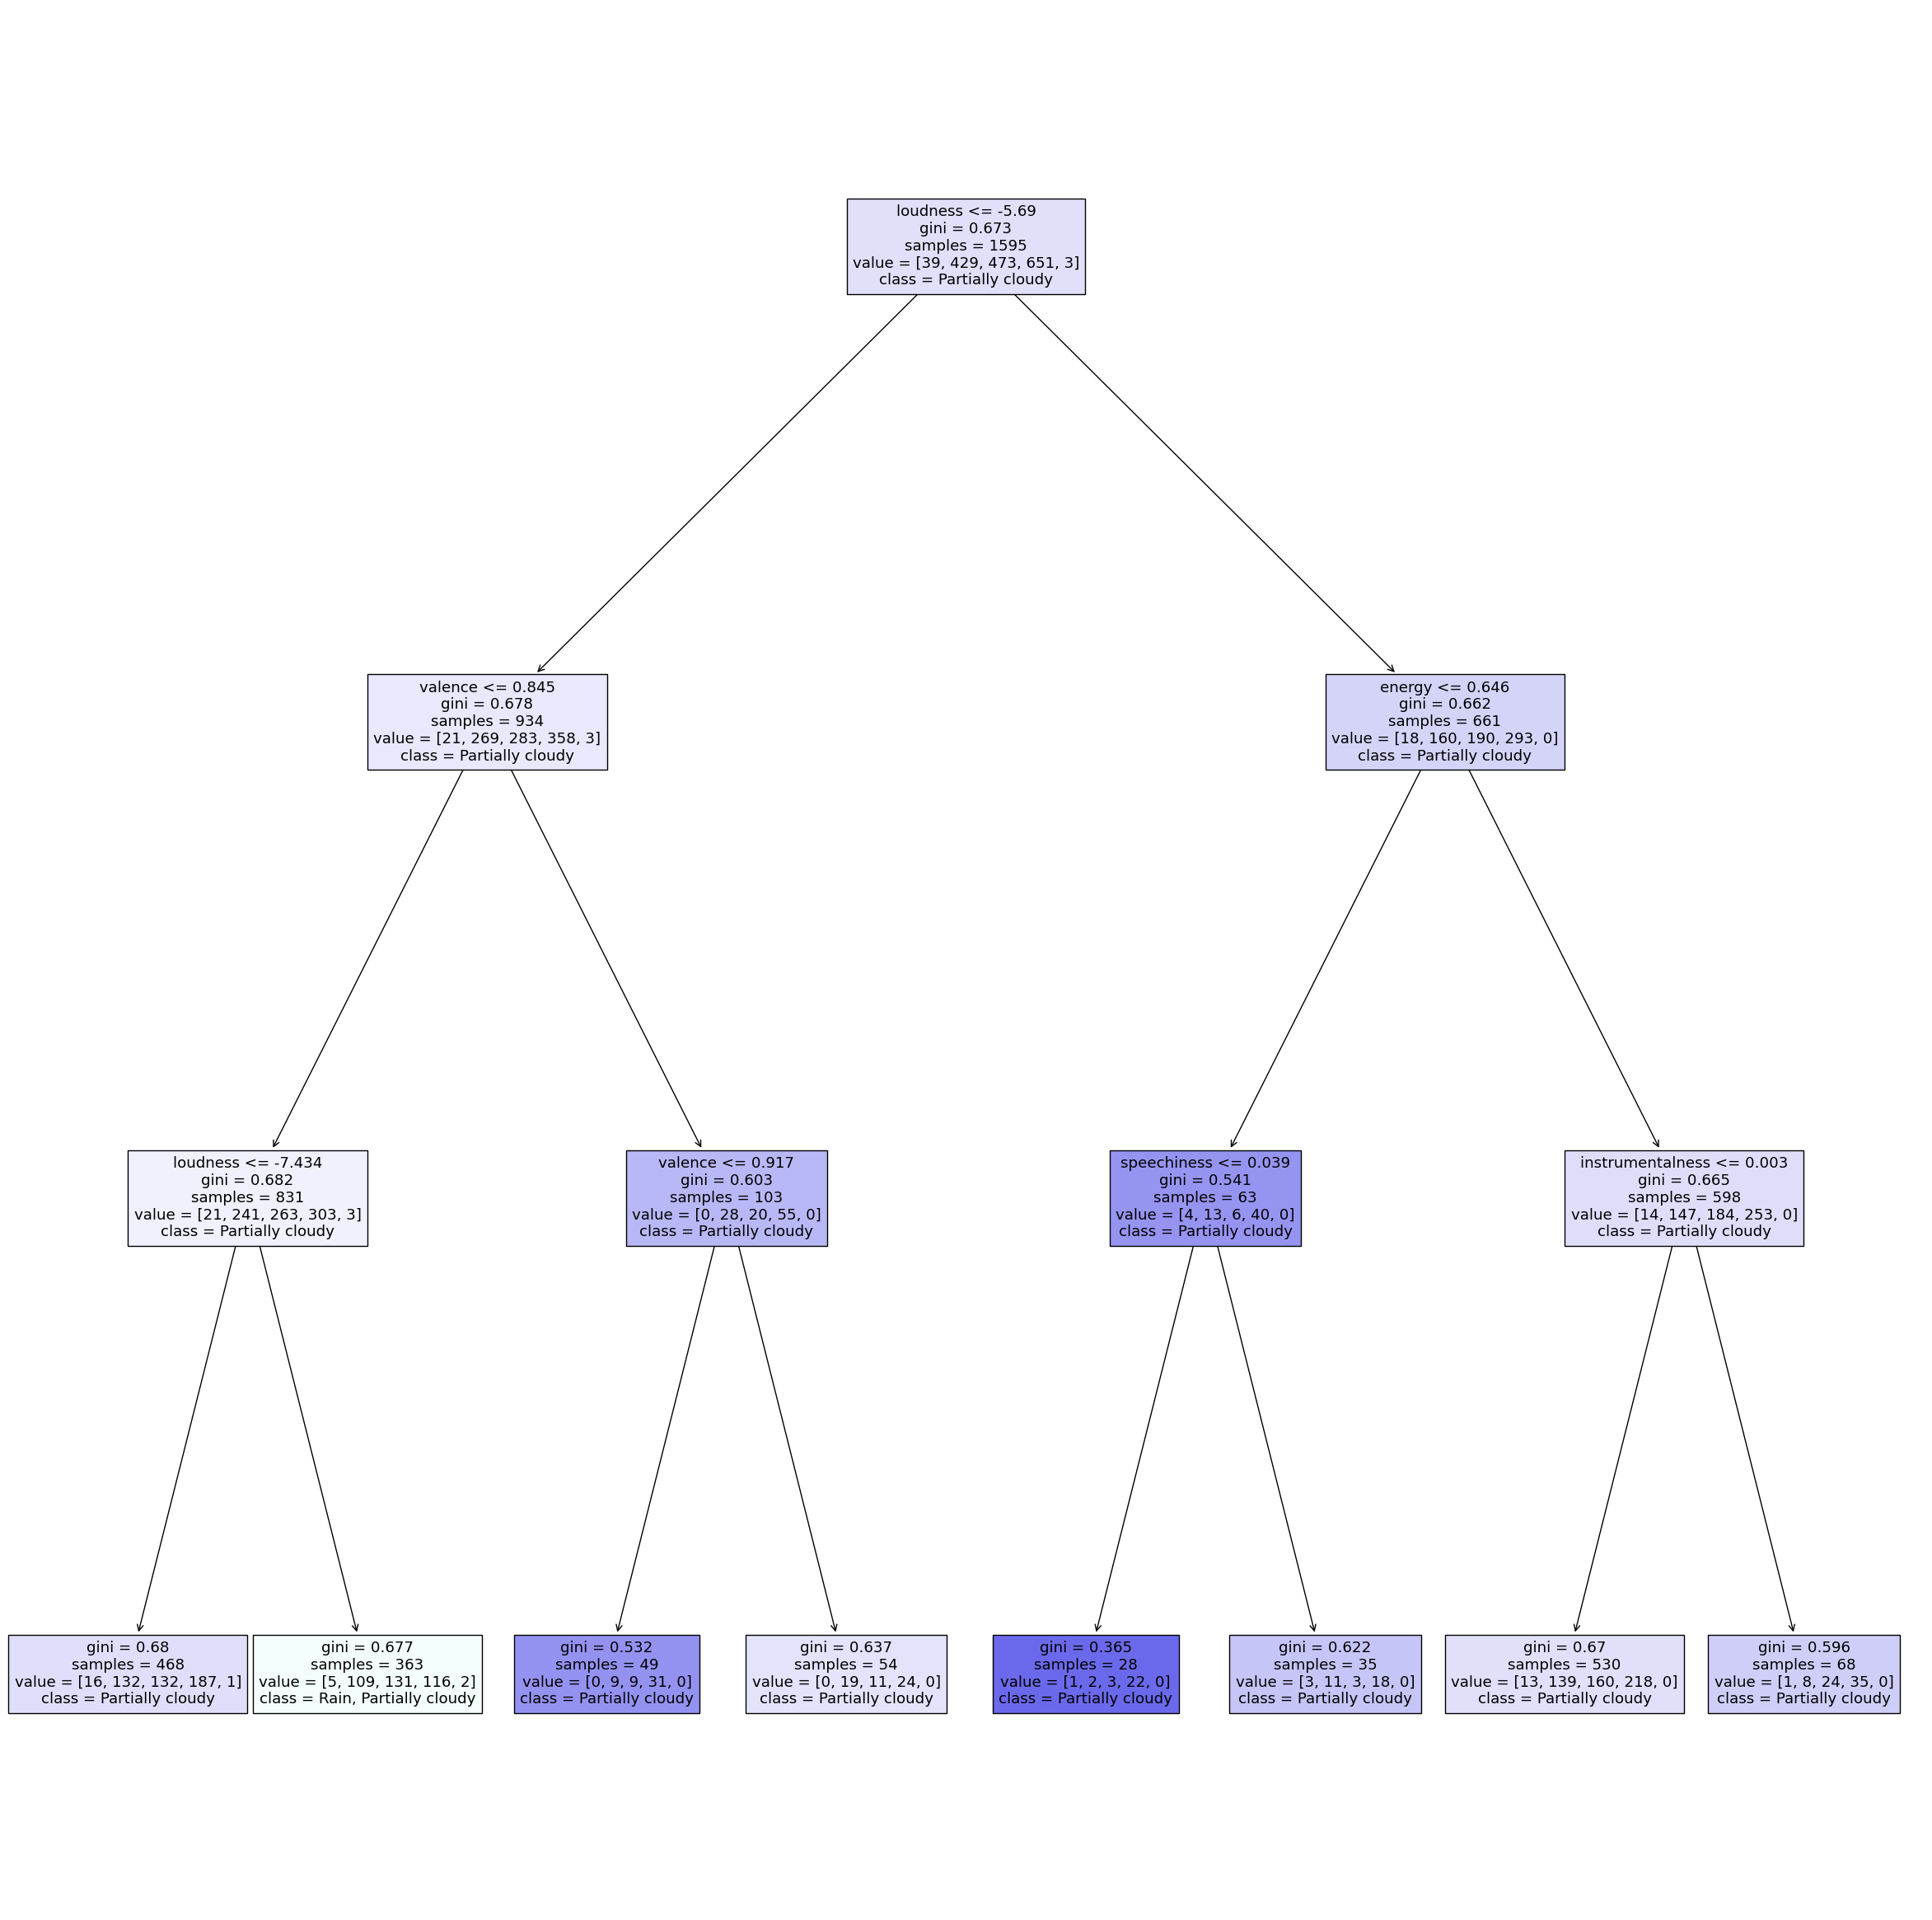

In [99]:
tree_accuracy(x, y, class_names=list(unique_conditions_key['conditions'].unique()), max_depth=3)

Accuracy: 0.6516290726817042


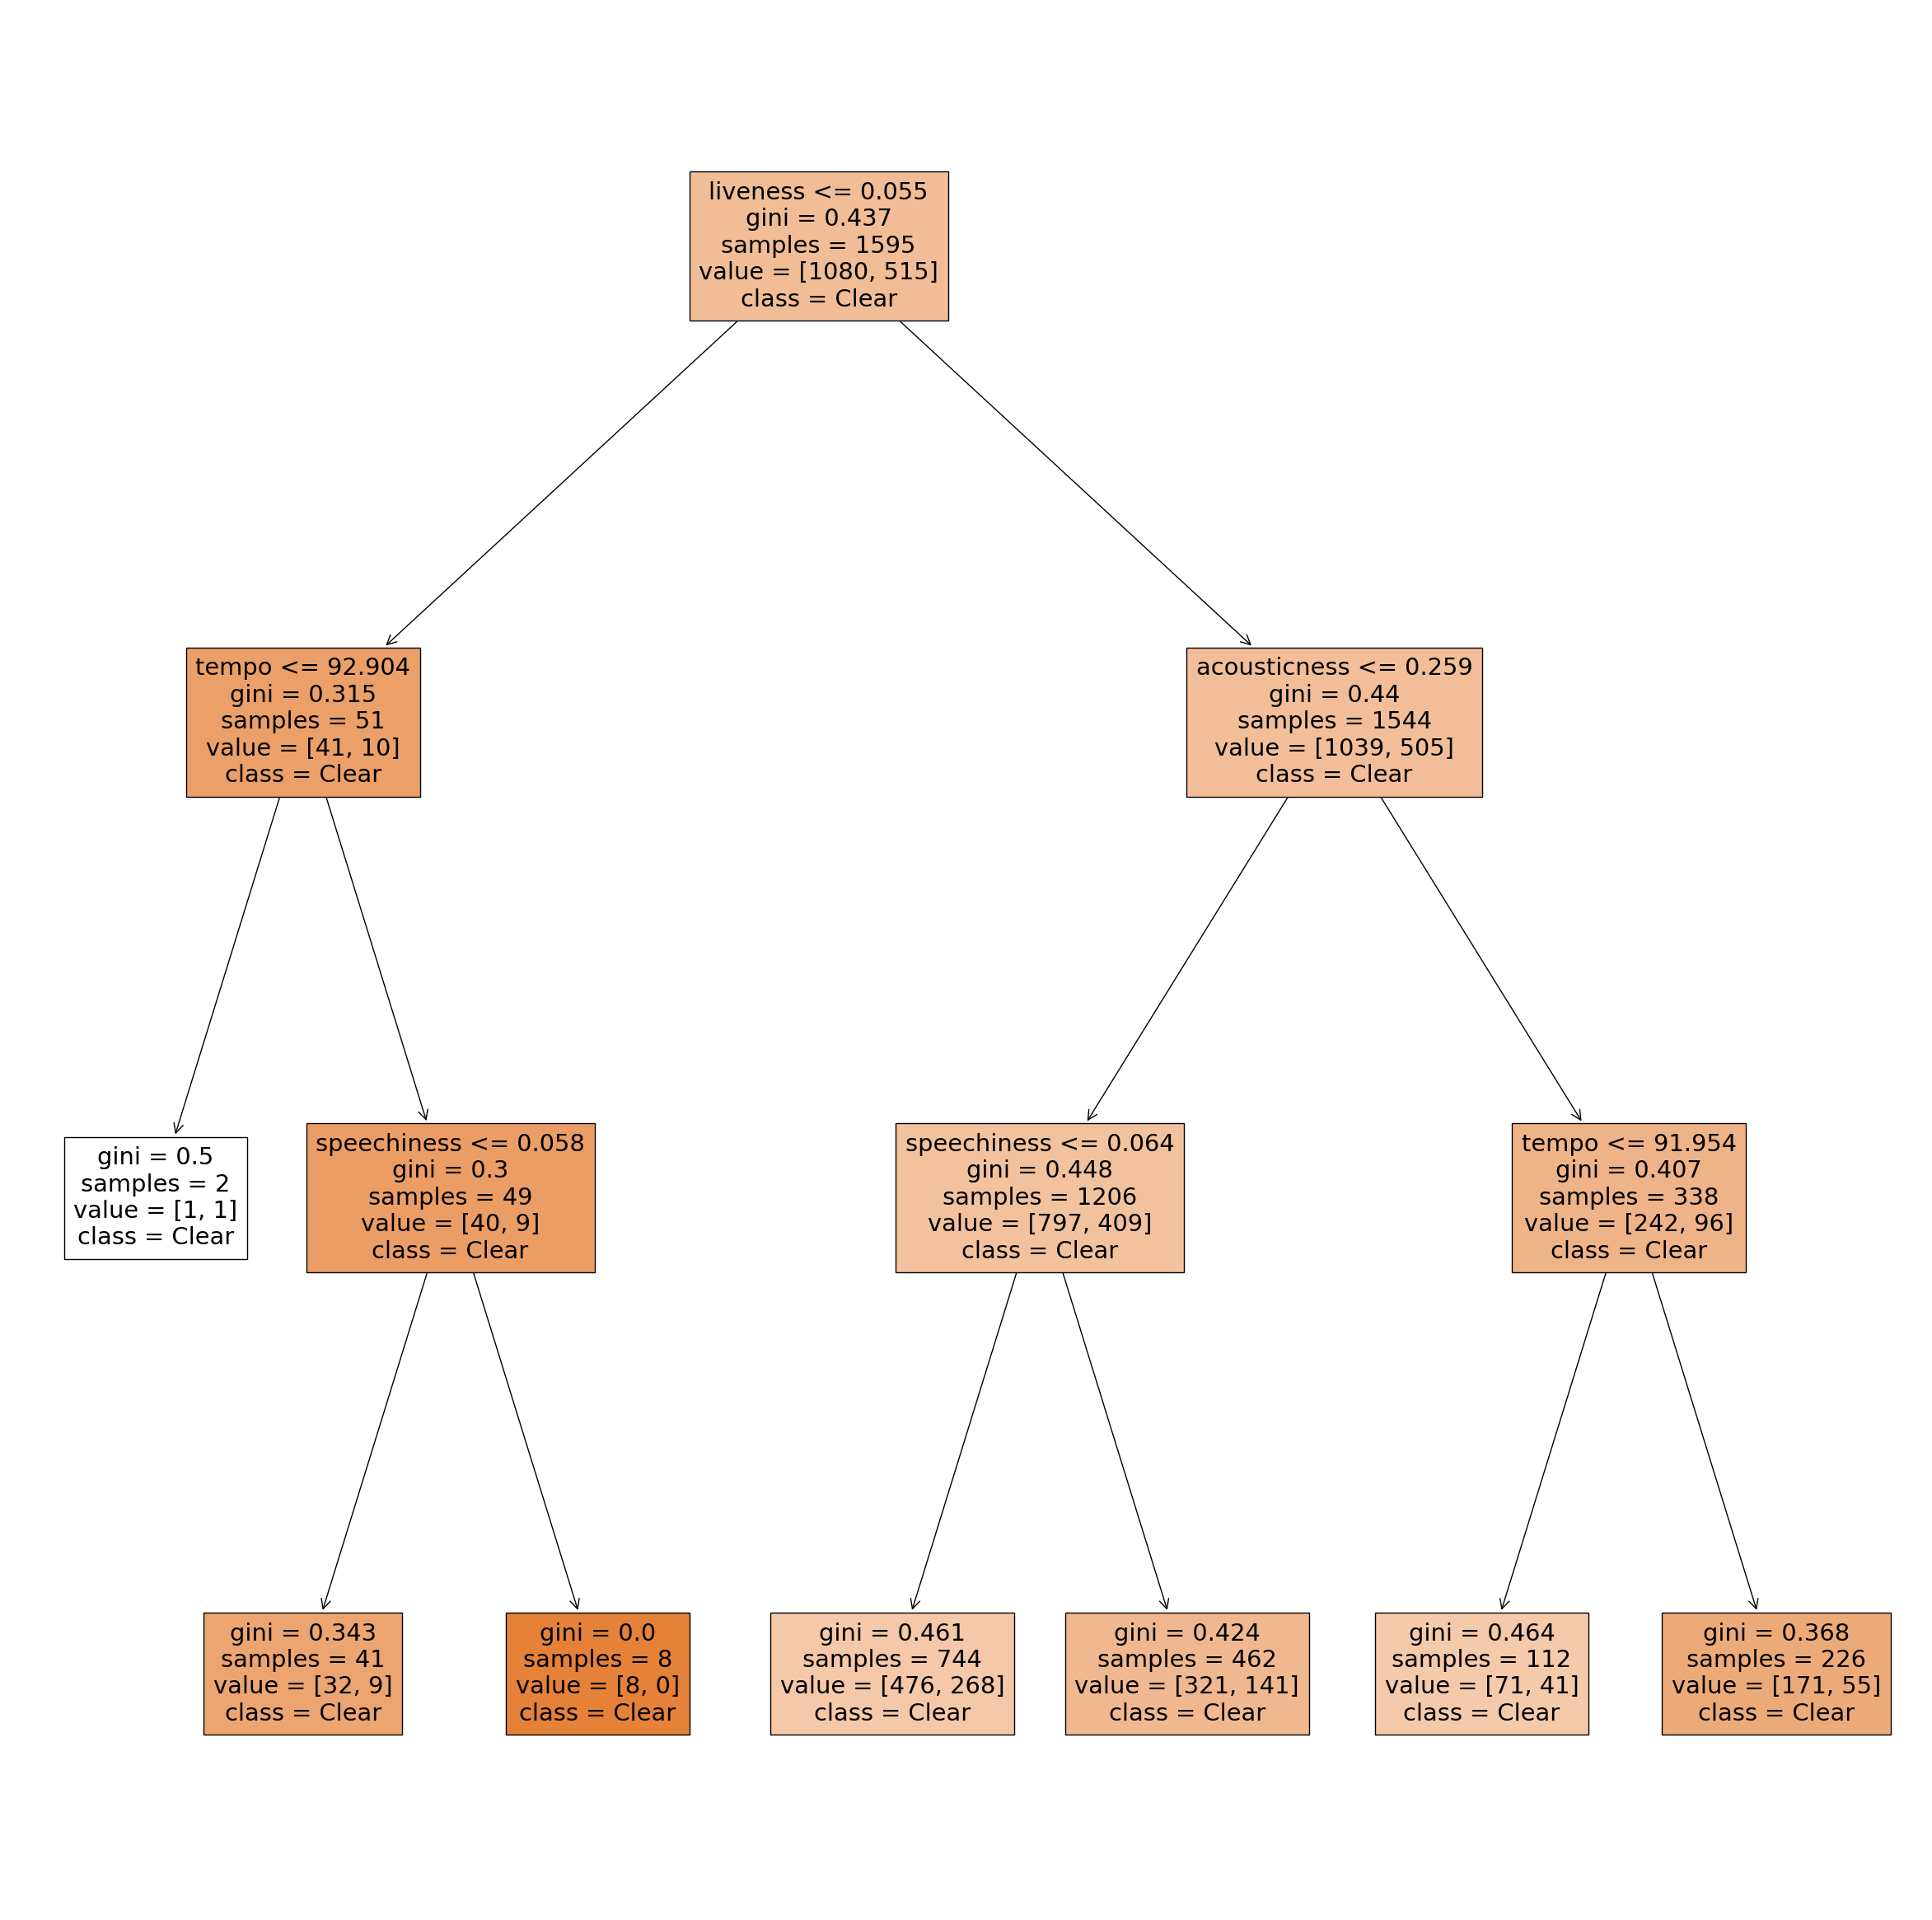

In [100]:
tree_accuracy(x, z, class_names={0: "Clear", 1: "Raining"}, max_depth=3)

##### Results
As stated by my initial hypothesis, the results of the **Decision Tree Classifier** shows a sub optimal score for the Enumerated conditions of ~35%. While not perfect, this is expected due to the distribution of visualized in [Data Analysis](#data-visualization) where the range of attributes is independent of the weather. An interesting thing to note from the visualization of the decision tree is the `class=output` on each leaf. In these visualizations, the only class outputs predicted are *"Partially Cloudy"* and *"Rain, Partially Cloudy"*. Due to this the imperfect accuracy score is made even clearer as the model was only able to predict 2 of the 5 attributes.

Similarly, the Binary Conditions share the same problem. With a sub optimal score of ~65%, the **Decision Tree Classifier** is unable to find a accurately predict the status of the weather and defaults to `class=clear`. This means that for every instance, the model outputs *"The weather is clear"*. Referring back to [Data Analysis](#data-visualization) this makes more sense as the *"Clear"* attribute is present on every day where *"rain"* is only present on some days. Due to this, predicting clear has a higher chance of being right then deciding between the two.

#### K Nearest Neighbor Classification
Using KNN classifier, the `KNeighborsClassifier()` object is given a variable initialization and used to create the knn object. Using the `.fit()` command, the **x_train** and **y_train** data frames are added to the model. Using this, the `.predict()` function calls the **x_test** data frame and returns the predicted output to **y_pred**. Finally, using `.accuracy_score()`, the **y_test** and **y_pred** data frames are compared and an accuracy score is returned.

Due to the nature of KNN classification inputs, the X input must be adjusted. This is done using `StandardScaller()` to standardize the featured to a unit variance. Similarly, the `SimpleImputer()` runs a self check to ensure there are no NAN values in my data. 

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

def knn_accuracy(X, y, metric='euclidean', k=3):
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    scaler = StandardScaler()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("accuracy =", accuracy)

In [106]:
knn_accuracy(x,y)

accuracy = 0.3483709273182957


In [107]:
knn_accuracy(x,z)

accuracy = 0.5989974937343359


##### Results
As stated by my initial hypothesis, the results of the **KNN Classifier** shows a sub optimal score for the Enumerated conditions of ~35%. While not perfect, this is expected due to the same reasoning mentioned earlier.

Similarly, the Binary Conditions share the same problem. With a sub optimal score of ~60%, the **KNN Classifier** actually performs worse than a **Decision Tree** most likely because it is attempting to predict between the two states and not defaulting to *"Clear Weather"*.

### Conclusion
Using a dataset containing the weather on each day, and my Spotify listening history. A merged table is then created keyed on the **date** attribute. To asses the success of my dataset and the ability to predict the weather, the classification methods used are KNN and Decision Tree. My initial hypothesis suggested sub optimal performance and that was proven by a sub 35% success rate on the enumerated conditions, and 65% on binary data. While the data was not successful in predicting its applications still hold true. Upon future revisions and a better original dataset, a precise model trained on my activities could be created to predict attributes such as my mental health. If brought to the main stream, one ethical issue might be the generalization of this technology and applications with advertisements and private corporations. Stronger legislation will need to be in place before this technology is used.